In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.collections import PolyCollection
import matplotlib.image as img
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from PIL import Image

basepath = '/Users/Miri/Documents/Research/EPhys/Modelling/IQ_Exc/Microcircuits/Mazza2023EEG/FrankMazza-EEG-Biomarkers-SST-d079a3d'

In [4]:
def plot_2D_cell(celltype,fig,plotspecs):
    ax = fig.add_axes(plotspecs,frameon=False)
    polycol = PolyCollection(np.load(basepath+celltype+'_polygons.npy'), edgecolors=pop_colors[celltype], facecolors=pop_colors[celltype])
    ax.add_collection(polycol)
    ax.axis(ax.axis('equal'))
    ax.set_title(newlabels[str(celltype)], fontsize=12, y=.98,x=.5)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def plot_timeseries(fig,plotspecs,ts):
    ax = fig.add_axes(plotspecs,frameon=False)
    ax.plot(ts,c='k')
    return ax

def plot_raster(fig,plotspecs,SPIKE):
    ax = fig.add_axes(plotspecs)
    for name, spts, gids in zip(popnames, SPIKE.item(0)['times'], SPIKE.item(0)['gids']):
        t = []
        g = []
        for spt, gid in zip(spts, gids):
            t = np.r_[t, spt]
            g = np.r_[g, np.zeros(spt.size)+gid]
        ax.plot(t[t >= 0], g[t >= 0], 's', color=pop_colors[name], markersize=.5)
    return ax

In [5]:
popnames = ['HL23PN1', 'HL23MN1', 'HL23BN1', 'HL23VN1']
pop_colors = {'HL23PN1':'k', 'HL23MN1':'red', 'HL23BN1':'green', 'HL23VN1':'orange'}
newlabels = {'HL23PN1':'Pyr', 'HL23MN1':'SST', 'HL23BN1':'PV', 'HL23VN1':'VIP'}

font = {'family':'arial','weight':'normal','size':10}
labelfont = {'family':'arial','weight':'bold','size':14}
labelfont2 = {'family':'arial','weight':'bold','size':10}

FileNotFoundError: [Errno 2] No such file or directory: '/home/e/etayhay/frankm/Mazza2022_scratch/data/figures/Figure1/Figure1-A-side.png'

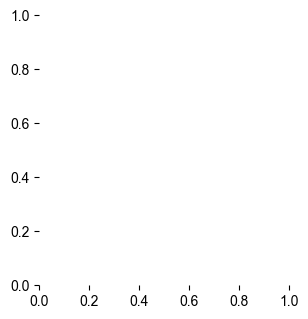

In [6]:
# fig 1
fig = plt.figure(figsize = (10,6))

font = {'family':'arial','weight':'normal','size':10}
labelfont = {'family':'arial','weight':'bold','size':14}
labelfont2 = {'family':'arial','weight':'bold','size':10}


matplotlib.rc('font', **font)

A = fig.add_axes([.13,.65,.25,.45],frameon=False)
# A.imshow(plt.imread(basepath + 'Figure1-A-side.png'))
# A.imshow(plt.imread(basepath + 'Figure1-A-side.png'))
A.set_xlim(70,425)
A.set_ylim(290,40)
A.set_xticks([])
A.set_yticks([])
A.scatter(130,120,marker='.',s=300,color='yellow')
circle = plt.Circle((131.5, 121), 14, color='yellow',fill=False)
A.add_patch(circle)


A2 = fig.add_axes([.42,.67,.2,.4],frameon=False)
A2.imshow(plt.imread(basepath + 'Column.jpg'))

A2.set_xlim(80,390)
A2.set_ylim(250,0)
A2.set_ylabel('Cortical Layers',**font)
A2.set_title('Cortical Surface',loc='left',x=.39,y=.97,**font)
x = 85
A2.annotate(xy=(x,65),s='I',**font)
A2.annotate(xy=(x,105),s='II / III',**font) 
A2.annotate(xy=(x,150),s='IV',**font) 
A2.annotate(xy=(x,180),s='V',**font)
A2.annotate(xy=(x,215),s='VI',**font)

xs = np.random.uniform(low=190, high=310, size=(150,))
ys = np.random.uniform(low=70, high=110, size=(150,))

A2.scatter(xs,ys,color='k',edgecolor='k',alpha=.5,s=10)
A2.set_xticks([])
A2.set_yticks([])

B = fig.add_axes([.15,0,.4,.7],frameon=False)
B.imshow(plt.imread(basepath + 'Figure1-B.png'))
B.set_xlim(1000,3900)
B.set_ylim(4400,1000)
B.set_xticks([])
B.set_yticks([])

cellh = .18
cellw = .2

PN = plot_2D_cell('HL23PN1',fig,[.03,.4,cellw,cellh])
MN = plot_2D_cell('HL23MN1',fig,[.03,.1,cellw,cellh])
BN = plot_2D_cell('HL23BN1',fig,[.5,.4,cellw,cellh])
VN = plot_2D_cell('HL23VN1',fig,[.5,.1,cellw,cellh])

# PN.set_title('C', loc='left', y=labely, x=labelx,**labelfont)


run = 0 #6 is when i want good image
seconds_to_plot = 2

end = int(40000*seconds_to_plot)

l = .75
w = .35

lfp = np.load(basepath + 'Fig1_LFP.npy')
eeg = np.load(basepath + 'Fig1_EEG.npy')

D = plot_timeseries(fig,[l,.93,w,.1],eeg)
E = plot_timeseries(fig,[l,.75,w,.1],lfp)
E.set_ylim(min(lfp), max(lfp)*1.3)


D.set_title('B',loc='left',y=1,x=-.2,**labelfont)
D.set_title('EEG', loc='center')

E.set_title('C',loc='left',y=.8,x=-.2,**labelfont)

lfp_depth = 725
lfp_title = 'LFP (-'+str(lfp_depth)+'$\\mu$m)'
E.set_title(lfp_title, y=.8,loc='center')


[ax.ticklabel_format(axis='both',useOffset=False, style='plain') for ax in [D, E]]
[ax.set_yticks([]) for ax in [D,E]]
[ax.set_xlim(0,end) for ax in [D,E]]
[ax.set_xticks([]) for ax in [D,E]]
[plt.setp(ax.get_xticklabels(), visible=False) for ax in [E]]

SPIKES = np.load(basepath + 'Fig1_Spikes.npy',allow_pickle=True)

F = plot_raster(fig,[l,.13,w,.5],SPIKES)
F.set_title('D',loc='left', y=1,x=-.2,**labelfont)
F.set_xlim(2000,4000)
F.set_xticks(np.arange(2000,4500,500))
F.spines['right'].set_visible(False)
F.spines['top'].set_visible(False)
F.set_ylabel('Cell Number',**font)
F.set_xlabel('Time (ms)',**font)
F.set_ylim(0,1000)

a = fig.text(.1,1.06,s='A',**labelfont)

# fig.savefig('/home/e/etayhay/frankm/Mazza2022_scratch/figures/figoutput/Figure1.jpeg', facecolor='white', edgecolor='none',bbox_inches = "tight",dpi=600)



# Creating A and B

In [ ]:
#===========================================
#A - make fig then screenshot, remove backgrounnd online, load in PNG
#===========================================

import time
print('Loading packages ...')
tic = time.perf_counter()
import numpy as np
import math
import mne
import os
import os.path as op
import mne
import pandas as pd
import matplotlib.pyplot as plt

from mne.datasets import sample
from nilearn.plotting import plot_surf
from mne.surface import _normal_orth
from mne.surface import _compute_nearest
from mne.viz import plot_alignment, snapshot_brain_montage
from nilearn.plotting import plot_anat
from nilearn.datasets import load_mni152_template

print('Done, took',round(time.perf_counter()-tic,2),'s')

# create brain image to load in

data_path = sample.data_path()

# The transformation file obtained by coregistration
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
subjects_dir = data_path + '/subjects'
subject = 'sample'

fname_ave = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evoked = mne.read_evokeds(fname_ave, condition='Right Auditory',baseline=(None, 0))
evoked.pick_types(meg=False, eeg=True)

fig = plot_alignment(evoked.info, subject=subject, subjects_dir=subjects_dir,eeg=False,meg=False,
                     surfaces=['pial'], trans=trans, coord_frame='mri')
#fig2 = mne.viz.set_3d_view(fig)#, 200, 70)#, focalpoint=[0, -0.005, 0.03])
# fig2 = mne.viz.set_3d_view(fig)


In [ ]:
#===========================================
# B - Circuit volume image shorter
#===========================================
fig = plt.figure(figsize=(10,20))

ax = plt.subplot(111,projection = '3d')
ax.view_init(elev=15,azim=45)

filename = 'Circuit_output/fig1_cell_positions_and_rotations.h5'
for name in popnames:
        with h5py.File(filename,'r') as f:
            for i in range(len(f[name])):
                ax.scatter(f[name][i][1], f[name][i][2], f[name][i][3]+350, c=pop_colors[name], marker='.',s=500, alpha=.5, edgecolor=pop_colors[name])

ax.set_xlim([-250, 250])
ax.set_ylim([-250, 250])
ax.set_zlim([-1300, 0])

ax.set_xticks(ticks=[-200,-100, 0, 100,200],)
ax.set_yticks(ticks=[-200, -100,0, 100,200])
ax.set_xticklabels([200,100,0,-100,-200])
ax.zaxis.set_tick_params(labelsize=18,pad=80)
ax.xaxis.set_tick_params(labelsize=18,pad=20)
ax.yaxis.set_tick_params(labelsize=18,pad=20)

#fig.savefig('Figure1-B.png',facecolor='white', edgecolor='none',dpi=650,bbox_inches='tight')